In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
df =  pd.read_csv("/content/sample_data/CHDdata.csv")

In [75]:
print(df.shape)
print(df.head)

(462, 10)
<bound method NDFrame.head of      sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11  Present     49    25.30    97.20   52   
1    144     0.01   4.41      28.61   Absent     55    28.87     2.06   63   
2    118     0.08   3.48      32.28  Present     52    29.14     3.81   46   
3    170     7.50   6.41      38.03  Present     51    31.99    24.26   58   
4    134    13.60   3.50      27.78  Present     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72   Absent     64    28.45     0.00   58   
458  182     4.20   4.41      32.10   Absent     52    28.61    18.72   52   
459  108     3.00   1.59      15.23   Absent     40    20.09    26.64   55   
460  118     5.40  11.61      30.79   Absent     64    27.35    23.97   40   
461  132     0.00   4.82      33.41  Present     62    14.70     0.00   46   

     chd  
0      1  
1

In [76]:
df['chd'].nunique()

2

In [77]:
df.replace({'famhist':{'Present':1, 'Absent':0}}, inplace=True)

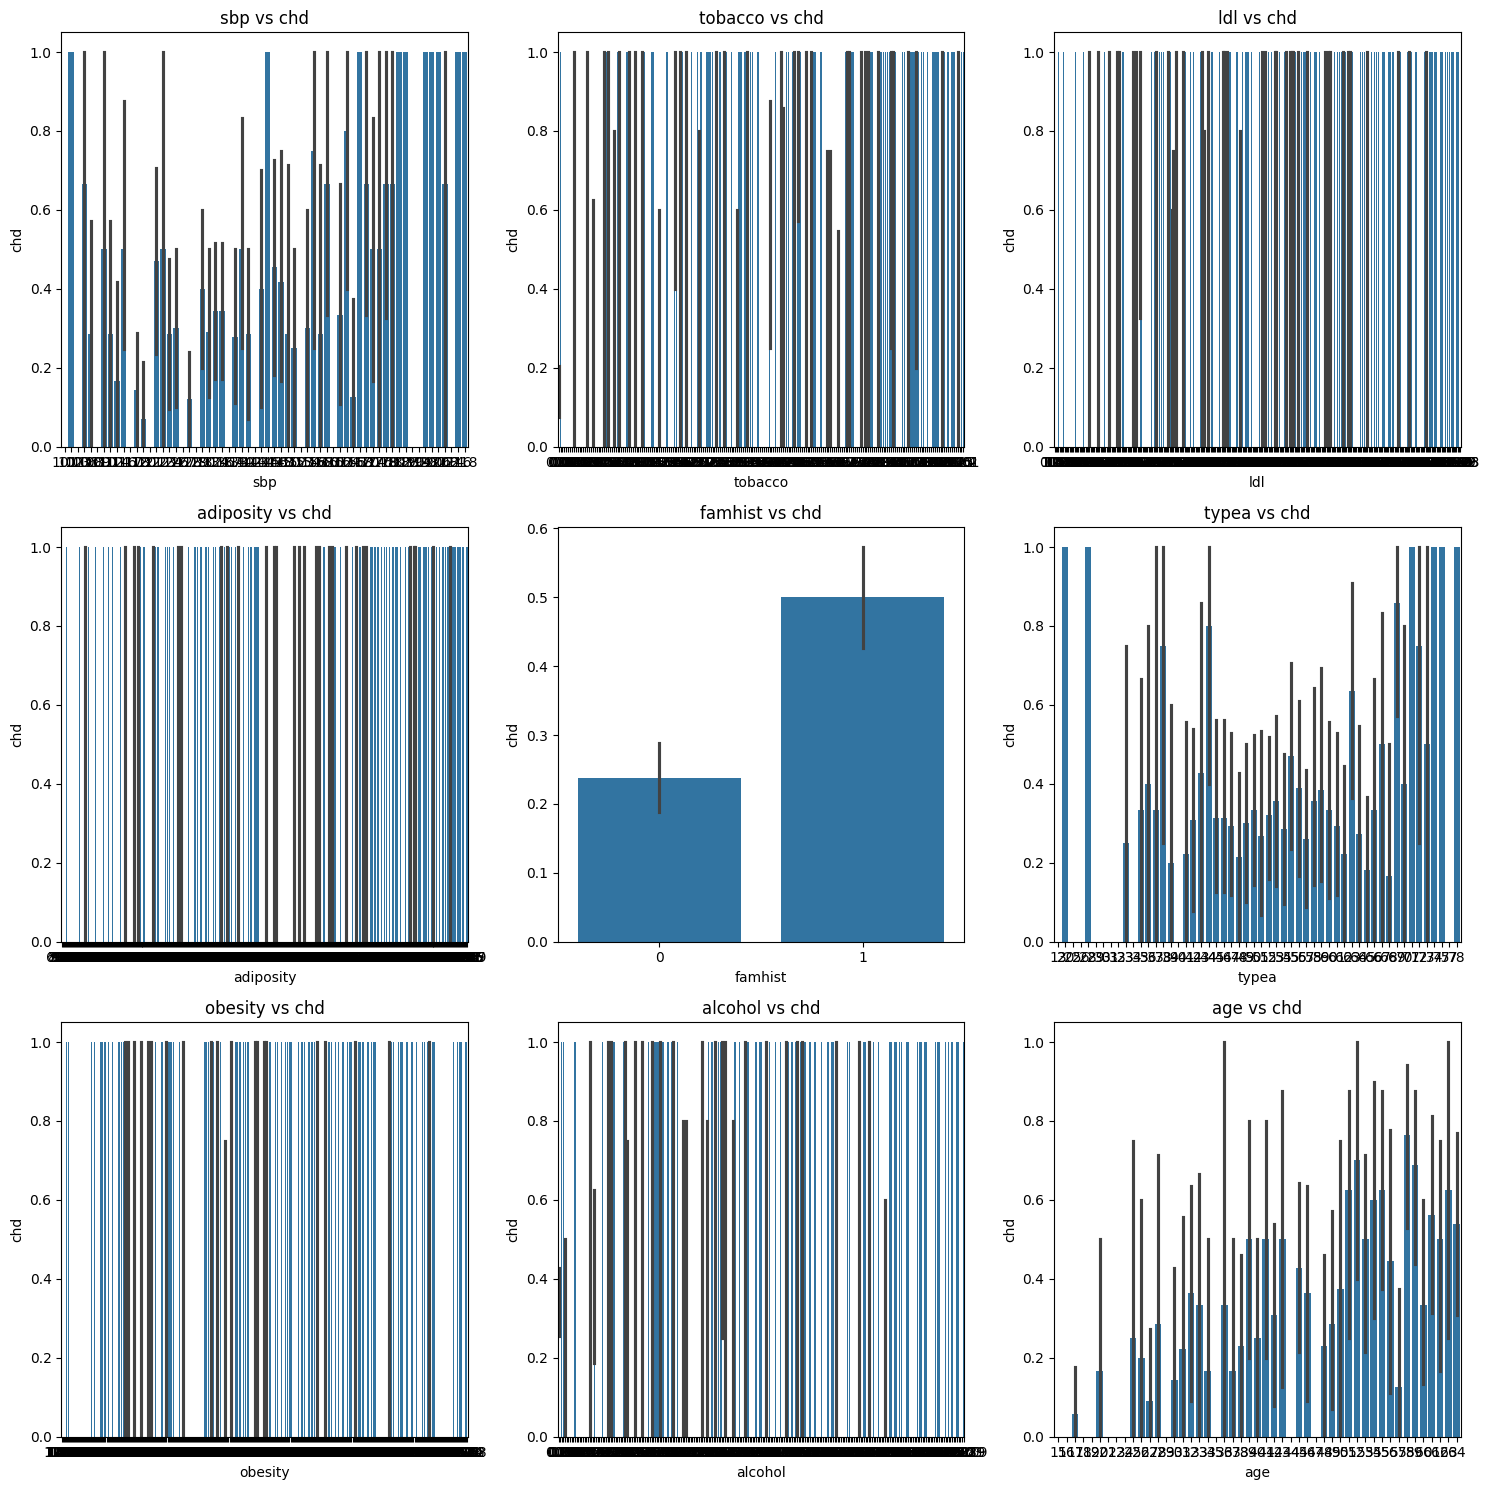

In [78]:
features = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.barplot(x=col, y='chd', data=df)
    plt.title(f'{col} vs chd')

plt.tight_layout()
plt.show()

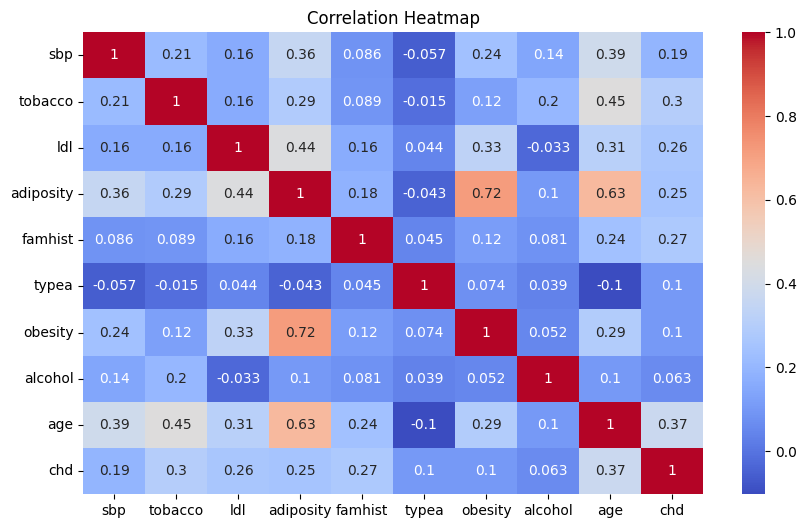

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [80]:
df.drop(columns=['adiposity'],inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

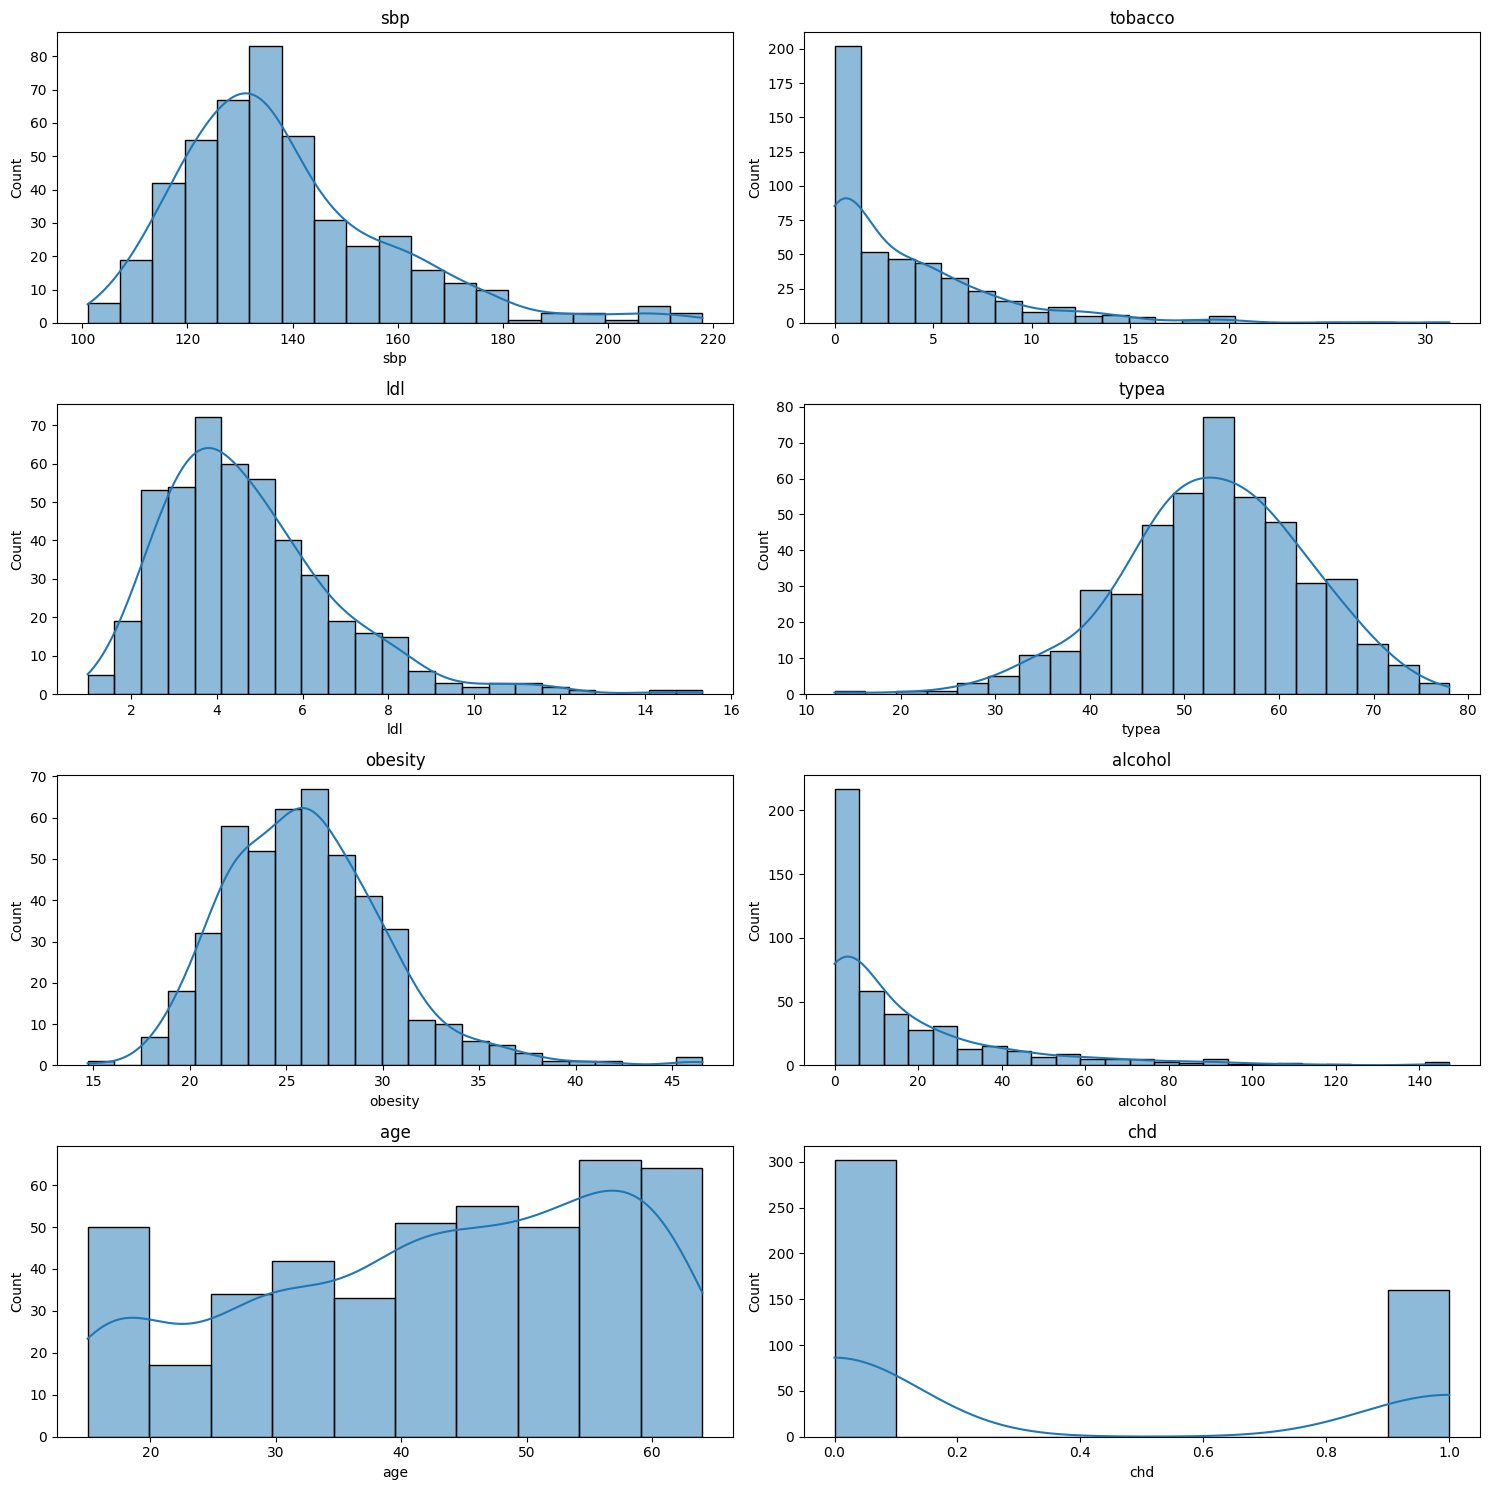

In [81]:
features = ['sbp', 'tobacco', 'ldl', 'typea', 'obesity', 'alcohol', 'age', 'chd']

plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    plt.subplot(4,2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}')
plt.tight_layout()
plt.show

In [82]:
df['typea'].skew()

-0.34643775469900984

In [83]:
df.shape

(462, 9)

**OUTLIER**

For Typea Z2 score method
for rest of use IQR box plot method

In [84]:
df['Z2_score'] = (df['typea'] - df['typea'].mean()) / df['typea'].std()
print(df[df['Z2_score'] < 3].shape)
print(df[df['Z2_score'] > 3].shape)

(462, 10)
(0, 10)


There is no outiler for column Typea

In [94]:
features = ['sbp', 'tobacco', 'ldl', 'obesity', 'alcohol', 'age', 'chd']
percentile1 = {}
percentile3 = {}
iqr = {}
upper_bound = {}
lower_bound = {}
for i, col in enumerate(features):
     percentile1[col] = df[col].quantile(0.25)
     percentile3[col] = df[col].quantile(0.75)
     iqr[col] = percentile3[col] - percentile1[col]
     upper_bound[col] = percentile3[col] + 1.5 * iqr[col]
     lower_bound[col] = percentile1[col] - 1.5 * iqr[col]
     print(f'{col}:', upper_bound[col])
     print(f'{col}:', lower_bound[col])
     data = {}
     data1 = {}
     data[col] = df[df[col] > upper_bound[col]]
     data1[col] = df[df[col].values < lower_bound[col]]
     print(f'{col}', data[col].shape)
     print(f'{col}', data1[col].shape)


sbp: 184.0
sbp: 88.0
sbp (15, 10)
sbp (0, 10)
tobacco: 13.67125
tobacco: -8.11875
tobacco (19, 10)
tobacco (0, 10)
ldl: 9.55125
ldl: -0.4787500000000007
ldl (14, 10)
ldl (0, 10)
obesity: 36.76625
obesity: 14.71625
obesity (8, 10)
obesity (1, 10)
alcohol: 58.966249999999995
alcohol: -34.56375
alcohol (33, 10)
alcohol (0, 10)
age: 91.0
age: -5.0
age (0, 10)
age (0, 10)
chd: 2.5
chd: -1.5
chd (0, 10)
chd (0, 10)
1
1


In [87]:

df['sbp'].max()

218

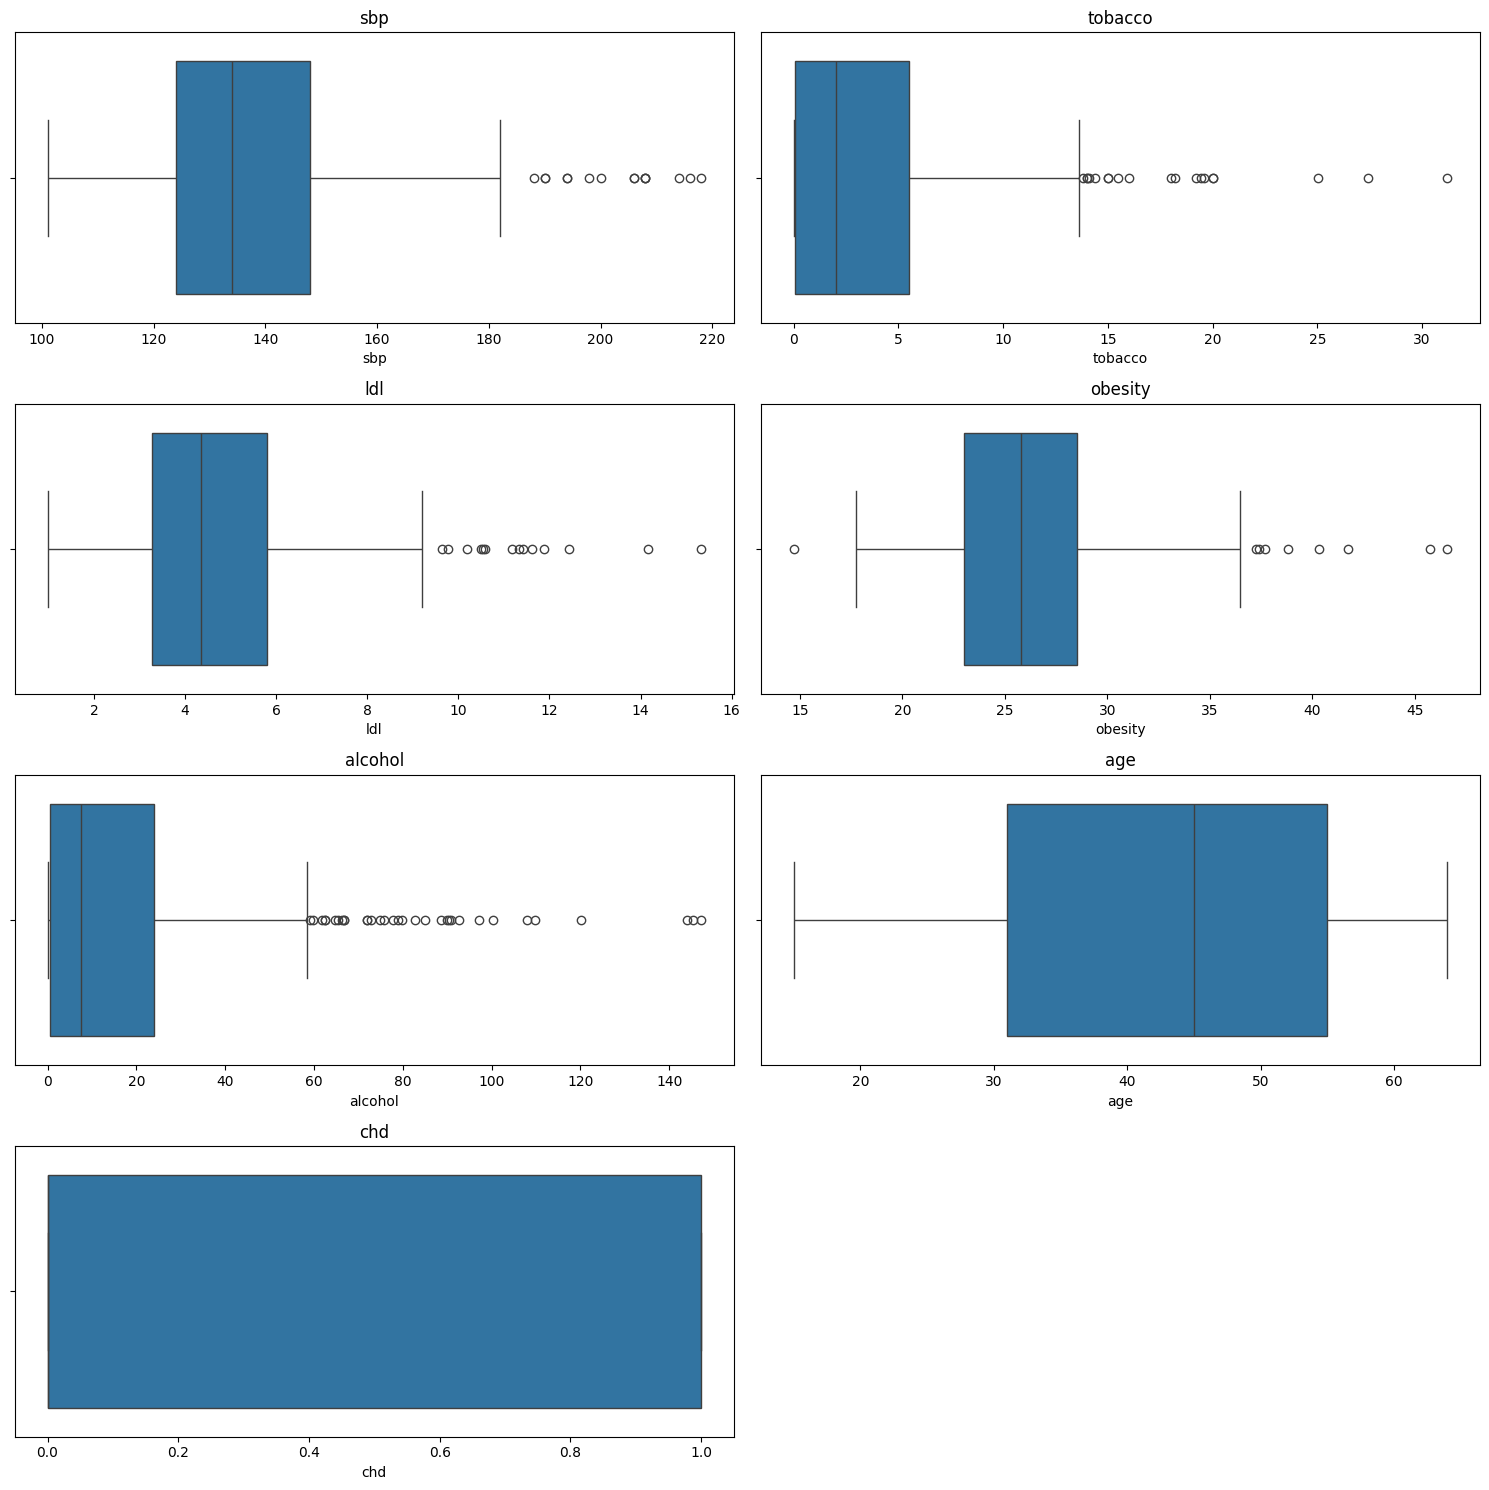

In [88]:
features = ['sbp', 'tobacco', 'ldl', 'obesity', 'alcohol', 'age', 'chd']

plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=col,data=df)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

**capping**

In [100]:
for i, col in enumerate(features):
    df[col] = np.where(df[col] > upper_bound[col],  upper_bound[col],df[col])
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
df

,sbp,tobacco,ldl,famhist,typea,obesity,alcohol,age,chd,Z2_score
0,160.0,12.00,5.73000,1,49,25.30000,58.96625,52.0,1.0,-0.418017
1,144.0,0.01,4.41000,0,55,28.87000,2.06000,63.0,1.0,0.193134
2,118.0,0.08,3.48000,1,52,29.14000,3.81000,46.0,0.0,-0.112441
3,170.0,7.50,6.41000,1,51,31.99000,24.26000,58.0,1.0,-0.214300
4,134.0,13.60,3.50000,1,60,25.99000,57.34000,49.0,1.0,0.702427
...,...,...,...,...,...,...,...,...,...,...
457,184.0,0.40,5.98000,0,64,28.45000,0.00000,58.0,0.0,1.109862
458,182.0,4.20,4.41000,0,52,28.61000,18.72000,52.0,1.0,-0.112441
459,108.0,3.00,1.59000,0,40,20.09000,26.64000,55.0,0.0,-1.334744
460,118.0,5.40,9.55125,0,64,27.35000,23.97000,40.0,0.0,1.109862


<function matplotlib.pyplot.show(close=None, block=None)>

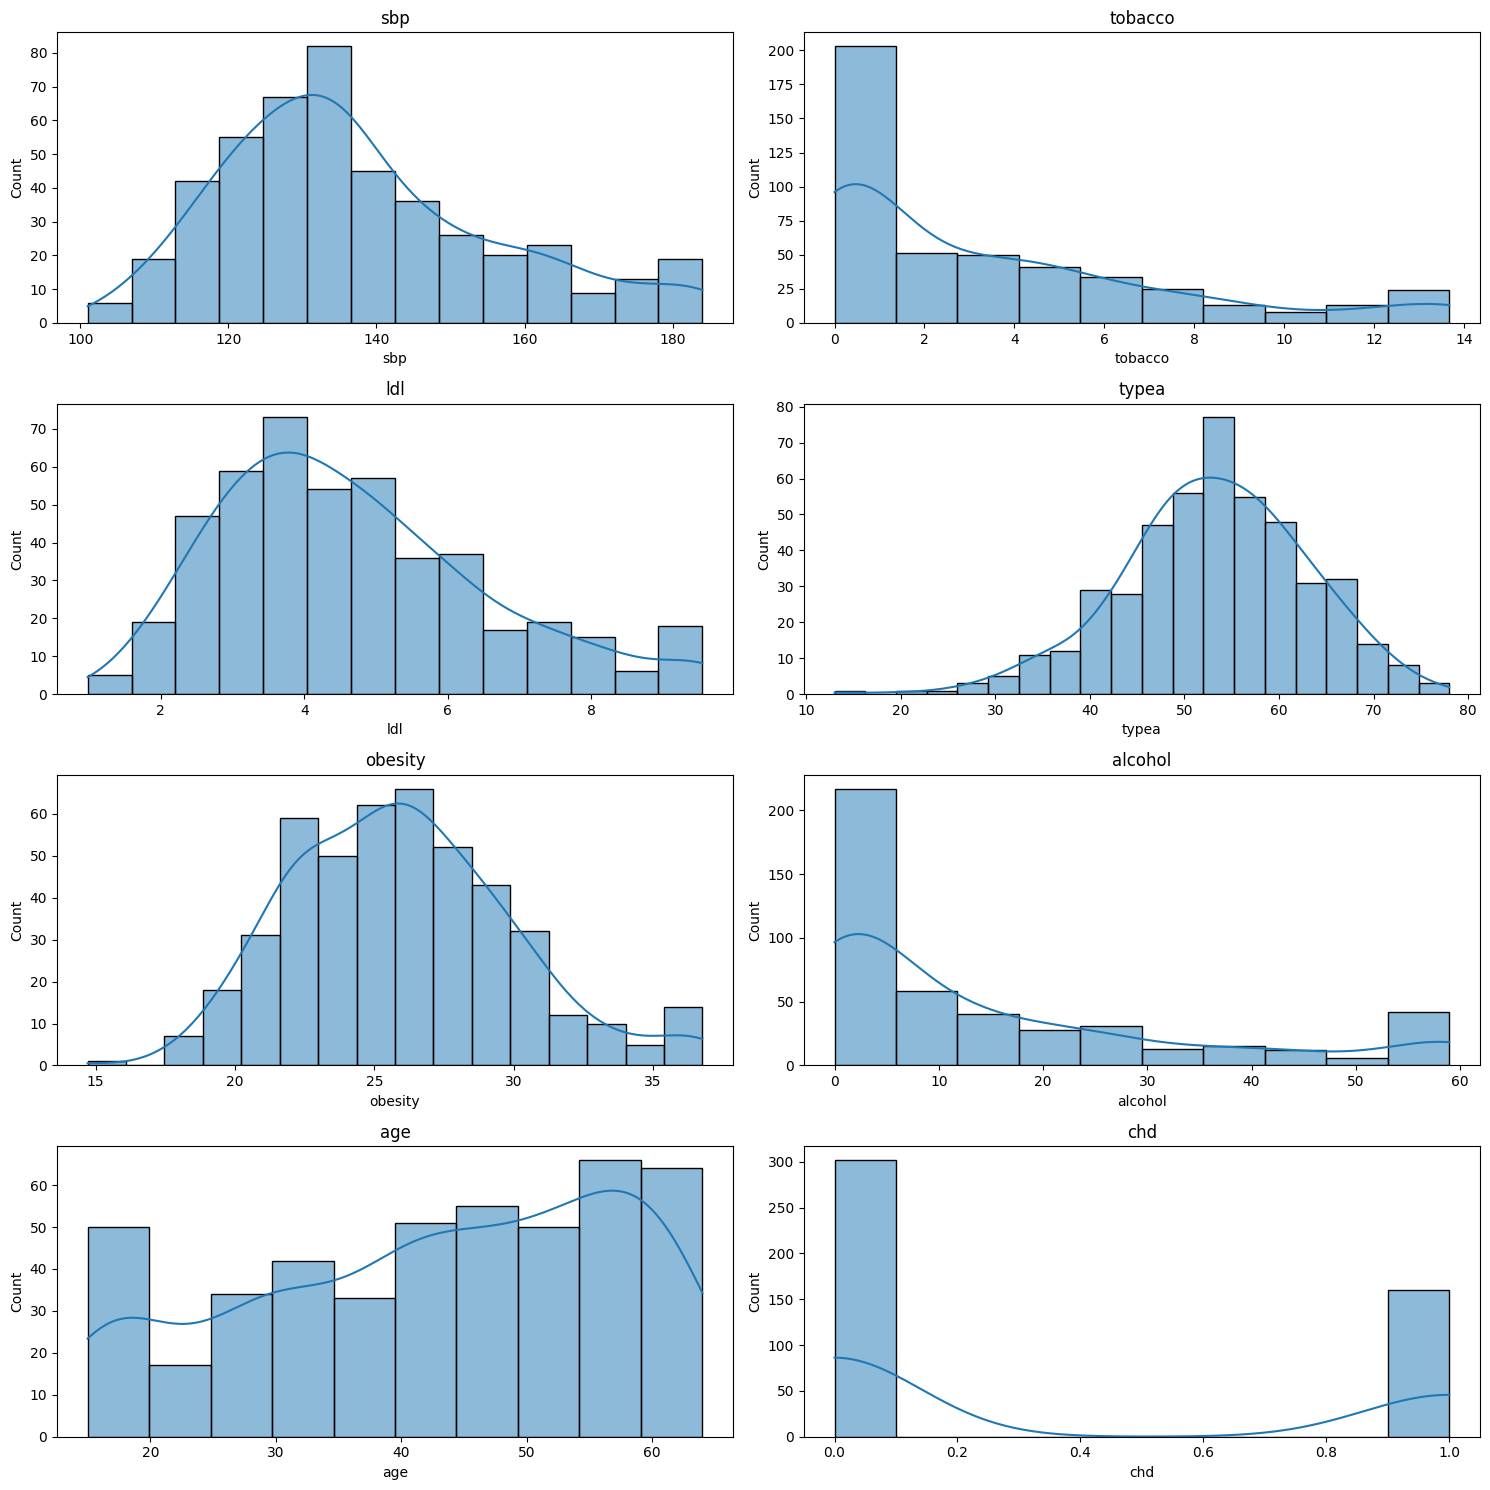

In [101]:
features = ['sbp', 'tobacco', 'ldl', 'typea', 'obesity', 'alcohol', 'age', 'chd']

plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    plt.subplot(4,2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}')
plt.tight_layout()
plt.show

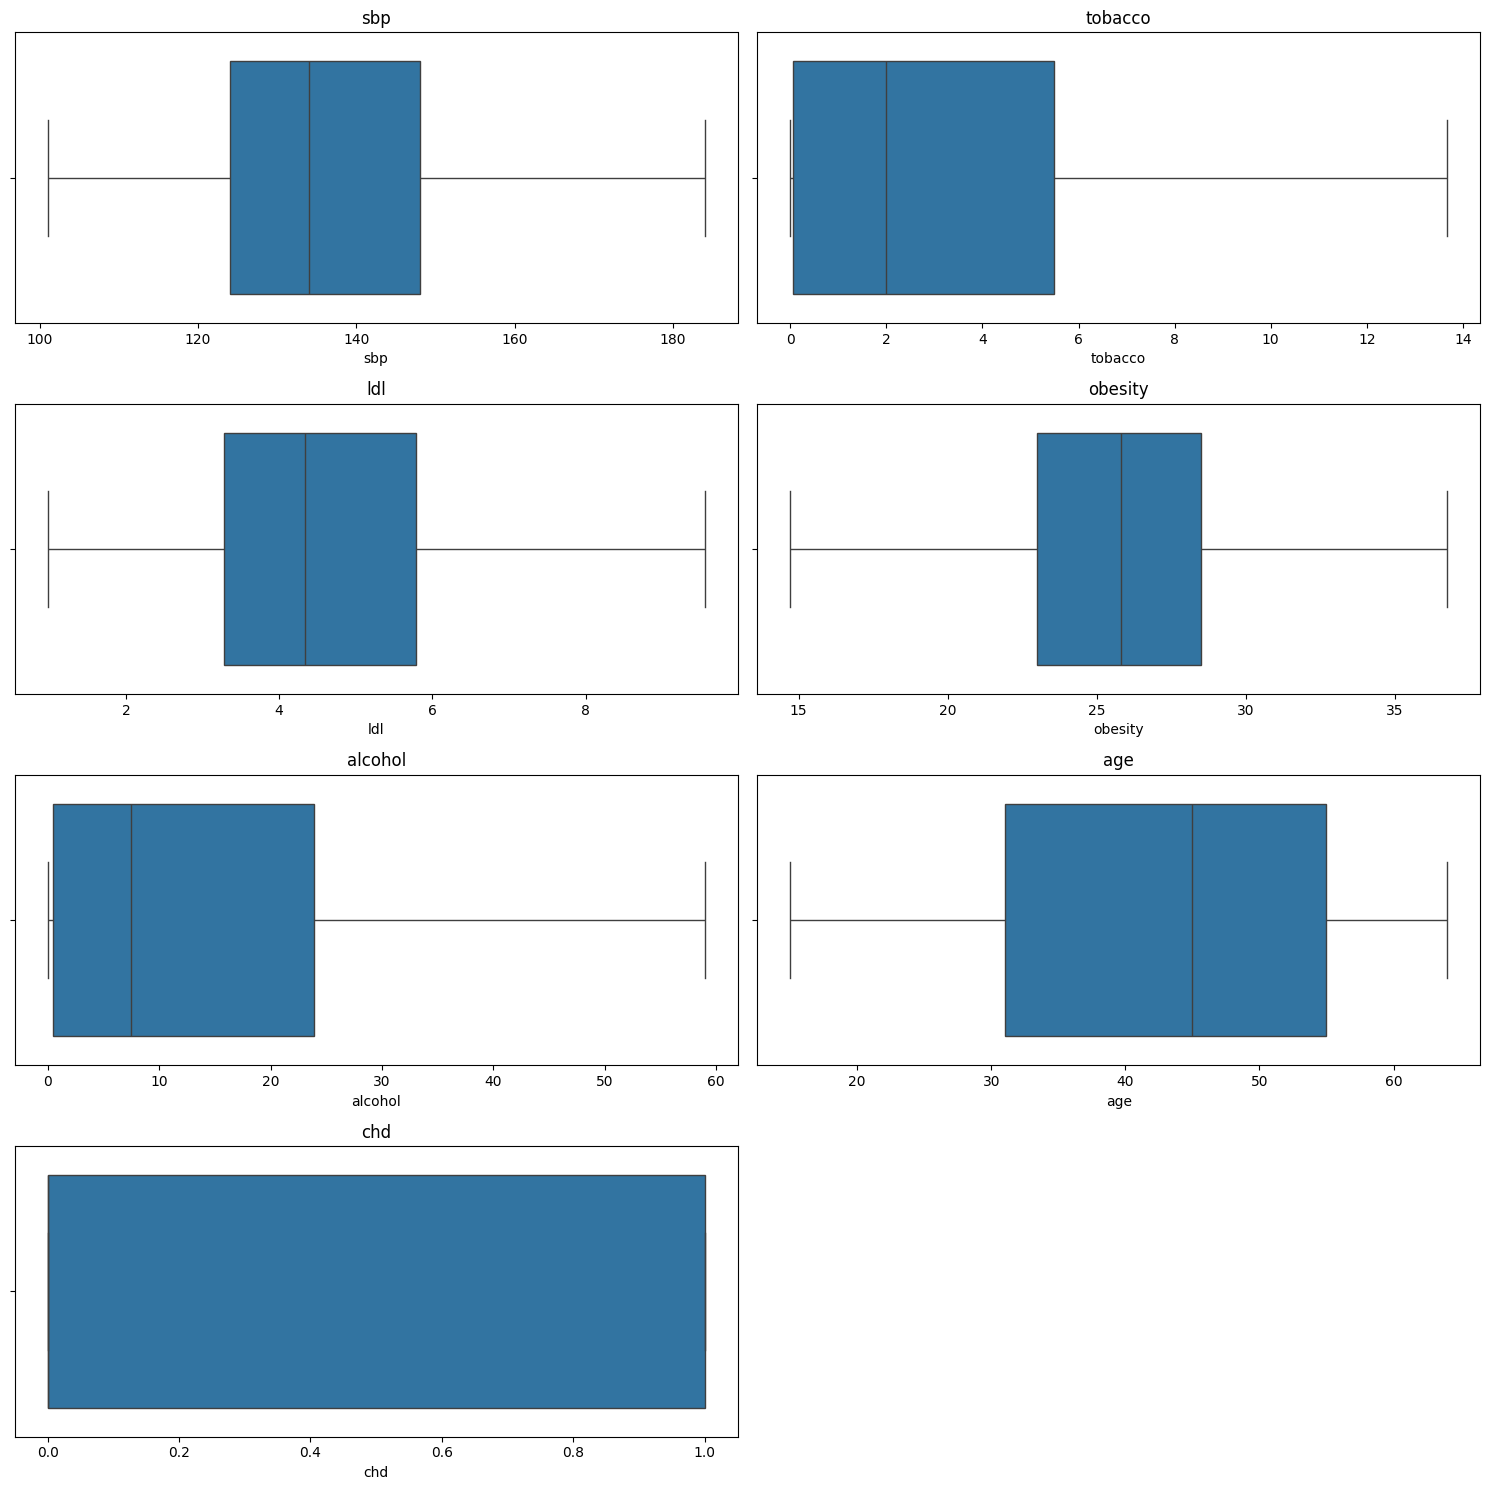

In [102]:
features = ['sbp', 'tobacco', 'ldl', 'obesity', 'alcohol', 'age', 'chd']

plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=col,data=df)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

In [109]:
df.drop(columns=['Z2_score'],inplace = True)

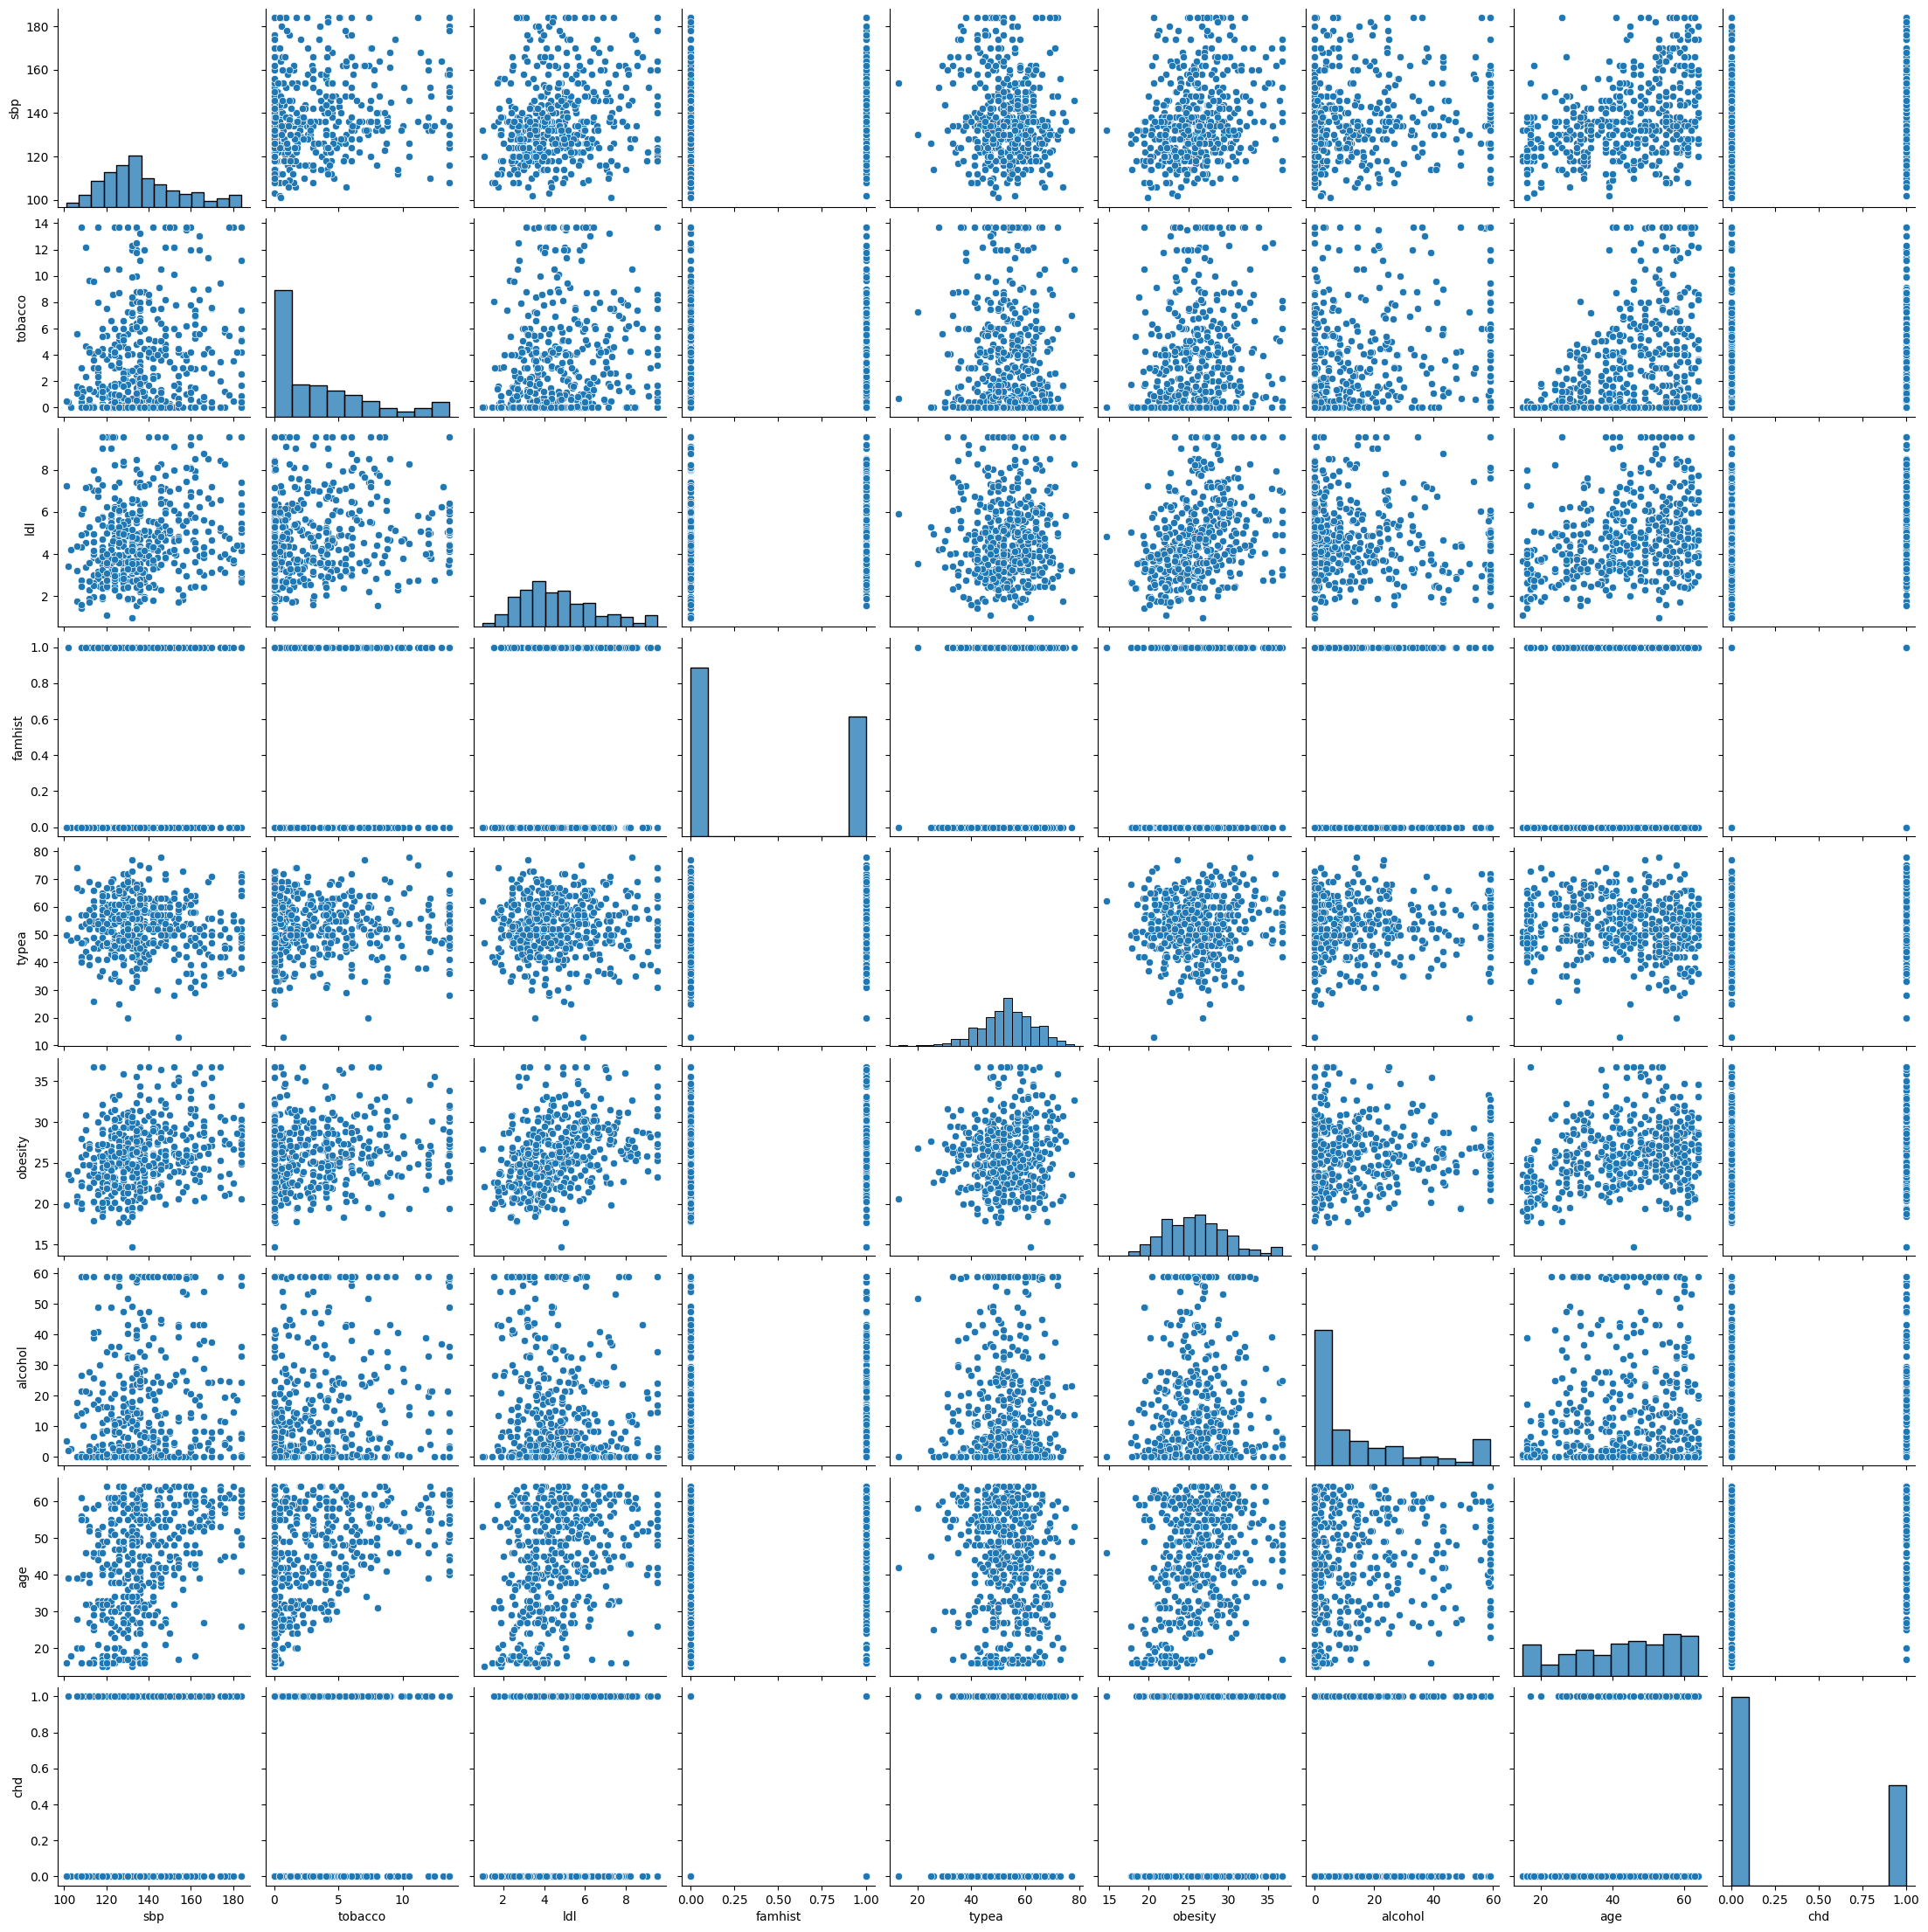

In [110]:
sns.pairplot(df, hue=None, diag_kind='hist', markers='o', plot_kws=None, height=2.5)

**Logistic Regression Model **



In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['chd']),df['chd'], test_size=0.2, random_state=42)


print(Y_test.dtype)

le = LogisticRegression()
le.fit(X_train,Y_train)

float64


LogisticRegression()

**Logistic Regression Model Accuracy Score **

In [112]:
from sklearn.metrics import accuracy_score
y_preds = le.predict(X_test)
accuracy_score = accuracy_score(Y_test,y_preds)
print(accuracy_score)

0.7634408602150538


**Logistic regression Using Standard Scaler Simultanelouly using Pipeline**
And
Accuracy Score


In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # Import the function

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, Y_train)
y_predict = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_predict)
print(accuracy)

0.7634408602150538


**SVM**

In [114]:
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
pipe = Pipeline([('scaler', scaler()), ('model', SVC())])
pipe.fit(X_train, Y_train)
y_predict = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_predict)
print(accuracy)

0.7419354838709677


**SVM without standard scaler**

In [115]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = SVC()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_predict)
print(accuracy)

0.6344086021505376


**Using GridSearchCV with SVM**

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
from sklearn.model_selection import train_test_split

grid_search.fit(X_train, Y_train)

# Print the best parameters and accuracy score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.712810070344317
